In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/ADMIN/Desktop/kuggle/1st_seminar_data.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# 데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# 데이터 결측치 확인
df.isna().sum()#없다는 뜻이다. isna()는 결측치 즉 nan이 있는지를 확인하는 것이고, 각 칸의 값에 결측치가 있으면 true 없으면 false를 배정하여 데이터 프레임을 리턴한다.
#그 데이터 프레임에 sum()을 걸면 true는 1 false는 0이므로 그냥 sum()의 경우에는 키워드인자로 axis가 있는데 axis=1은 행기준이고 default는 열기준으로 합하여 시리즈로 만들어 리턴한다.
#sum의 경우 데이터 프레임에 걸면 시리즈를 리턴하고 시리즈에 걸면 시리즈의 데이터들의 총합을 리턴한다. 그리고 담겨있는 자료형에 따라 연산의 결과가 다르다. ex) 정수는 단순 더하기 문자열은 이어붙이기.
#출력 결과를 보면 열기준으로 합하여 시리즈를 리턴해줬는데 시리즈의 각 인덱스의 값이 0이라는 것은 isna()의 결과로 인덱스에 해당하는 열에 false만이 리턴되었다. 즉 결측치가 없다는 뜻이다.

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 1. race_ethnicity의 분포 확인

In [6]:
# 코드 작성
print(df['race_ethnicity'].value_counts())#value counts는 값별로 데이터의 수를 출력해주는 함수 범주형 자료에서 도수를 계산할 때 사용한다.
print(df.groupby('race_ethnicity')['race_ethnicity'].count().sort_values(ascending=0))#df를 race_ethnicity로 그룹화하여 race_ethnicity열만 출력하고 count()하면 비슷한 출력이다.
#count()는 데이터 프레임이나 시리즈에서 결측치를 제외하고 실제로 존재하는(non-null) 값의 개수를 세는 데 사용됩니다. 
print(df.count())#데이터 프레임에서 사용할 경우 각 열에대해서 몇개의 데이터가 존재하는지를 알려준다. 즉 각 열에서 결측치를 제외한 행의 개수를 이야기 해주는 것이다.

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64


### 2. 데이터 컬럼명 바꾸기
- math_score -> math
- reading_score -> reading
- writing_score -> writing
- rename() 사용

In [7]:
# 코드 작성
#DataFrame.rename(columns={'old_name': 'new_name'}, index={'old_index': 'new_index'}, inplace=True)
#columns: 열 이름을 변경할 때 사용하는 매개변수입니다. 딕셔너리 형태로 {기존 이름: 새로운 이름}의 매핑을 제공합니다.
#index: 인덱스 이름을 변경할 때 사용하는 매개변수입니다. 마찬가지로 딕셔너리 형태로 {기존 이름: 새로운 이름}의 매핑을 제공합니다.
#inplace: 이 매개변수가 True로 설정되면, 원본 데이터프레임이 직접 변경되며 새로운 데이터프레임이 반환되지 않습니다. False로 설정할 경우, 새로운 데이터프레임이 반환되며 원본은 변경되지 않습니다.
df.rename(columns={'math_score':'math','reading_score':'reading','writing_score':'writing'},inplace=True)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 3. parental_level_of_education 칼럼 삭제하기
- drop() 사용
- axis=0 : 행 방향, axis=1 : 열 방향

In [8]:
# 코드 작성
df.drop(labels='parental_level_of_education', axis=1, inplace=True)

In [9]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95
996,male,group C,free/reduced,none,62,55,55
997,female,group C,free/reduced,completed,59,71,65
998,female,group D,standard,completed,68,78,77


### 4-1. test_preparation_course의 none -> 0, completed -> 1로 바꾸기
- str.replace() 사용
- str.replace('a','b') : 'a' 값을 'b' 값으로 대체

In [10]:
# 코드 작성
df['test_preparation_course']=df['test_preparation_course'].str.replace('none','0')#원래의 시리즈를 새로 만든 시리즈로 대체한거다. 이래야 원본이 변한다.
df['test_preparation_course']=df['test_preparation_course'].str.replace('completed','1')

In [11]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,0,72,72,74
1,female,group C,standard,1,69,90,88
2,female,group B,standard,0,90,95,93
3,male,group A,free/reduced,0,47,57,44
4,male,group C,standard,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,1,88,99,95
996,male,group C,free/reduced,0,62,55,55
997,female,group C,free/reduced,1,59,71,65
998,female,group D,standard,1,68,78,77


### 4-2. lunch의 free/reduced -> 0, standard -> 1로 바꾸기

In [60]:
# 코드 작성
df['lunch']=df['lunch'].str.replace('free/reduced','0')
df['lunch']=df['lunch'].str.replace('standard','1')

In [61]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,1,0,72,72,74
1,female,group C,1,1,69,90,88
2,female,group B,1,0,90,95,93
3,male,group A,0,0,47,57,44
4,male,group C,1,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,1,1,88,99,95
996,male,group C,0,0,62,55,55
997,female,group C,0,1,59,71,65
998,female,group D,1,1,68,78,77


### 5. math의 결측치를 평균값으로 대체하기

In [67]:
# 임의로 결측치 만들기
math_indices = list(np.random.randint(0, 1000, size=10))
df.iloc[[math_indices],[4]]=np.nan
# 코드 작성
df.isna().sum()

gender                      0
race_ethnicity              0
lunch                       0
test_preparation_course     0
math                       19
reading                     0
writing                     0
dtype: int64

In [70]:
# 평균값으로 대체하기
# 코드 작성
df['math']=df['math'].fillna(df['math'].mean())

In [73]:
df.isna().sum()

gender                     0
race_ethnicity             0
lunch                      0
test_preparation_course    0
math                       0
reading                    0
writing                    0
dtype: int64

### 6. 성별에 따른 reading 평균값 계산하기

In [74]:
# 코드 작성
df.groupby('gender')['reading'].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

### 7. test_preparation_course별 writing 점수 분포 그래프 그리기

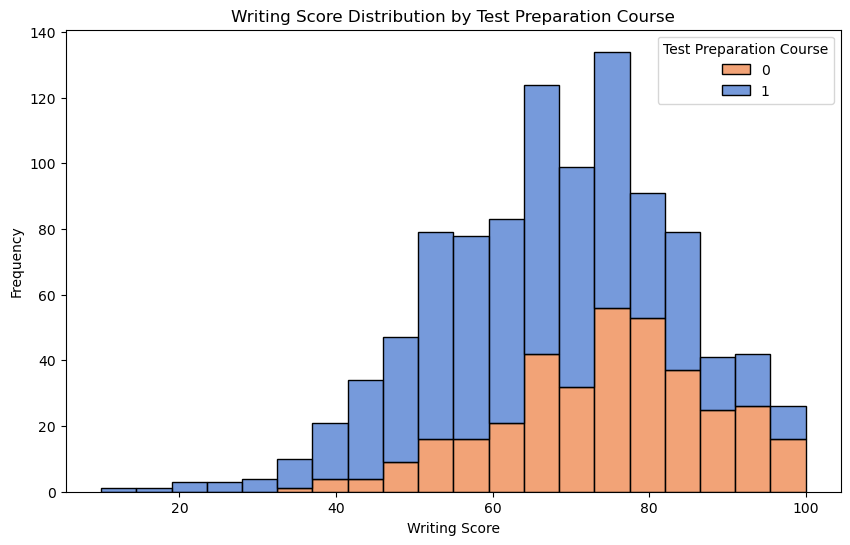

In [80]:
plt.figure(figsize=(10, 6)) #그림(figure) 생성 및 해당 그림 크기 지정 
sns.histplot(data=df,x='writing',hue='test_preparation_course',bins=20,multiple='stack',palette='muted') #히스토 그램은 도수분포표를 시각화 한것
#data 히스토그램을 그릴 바탕이되는 데이터, x 어떤 변수에 대해서 그릴건지 bins x축간격  multiple='stack' - histogram을 쌓아서 그리라는 의미 palette='muted'는 seaborn에서 제공하는 색깔 세트 중 하나.
plt.title('Writing Score Distribution by Test Preparation Course')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.legend(title='Test Preparation Course', labels=['0', '1']) #범례 추가
plt.show()

### 8-1. math_score, reading_score 관계 산점도로 나타내기 

In [13]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/kuggle/1st_seminar_data.csv")

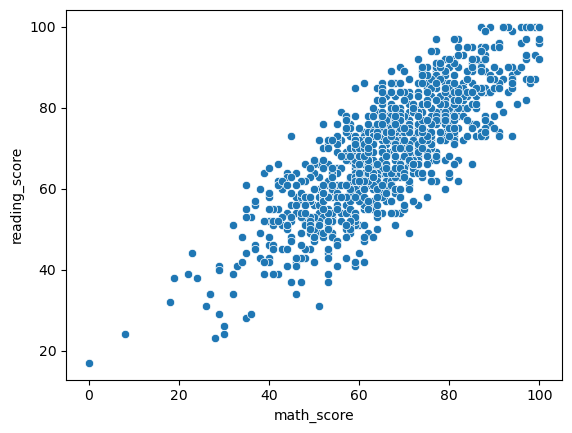

In [22]:
# 코드 작성
plt.figure()
plt.scatter(df['math_score'], df['reading_score'],edgecolors='white',linewidths=0.5)
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.show()

### 8-2. 위에서 확인한 데이터 구조와 형태 등을 참고하여 8-(1)의 그래프 해석해보기

###<힌트>

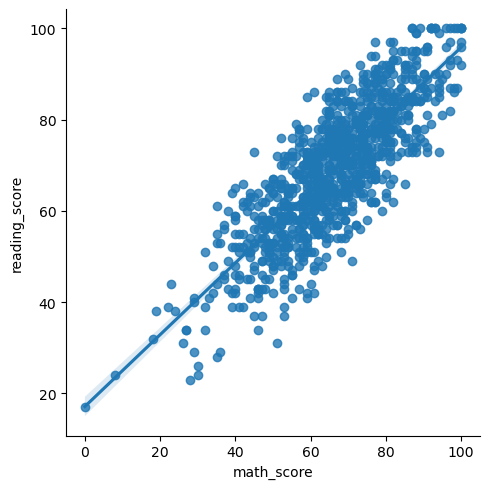

In [30]:
# sns.scatterplot에 회귀선 추가
sns.lmplot(data=df, x='math_score', y='reading_score')
plt.show()

In [23]:
from scipy import stats

# math_score와 reading_score 간의 피어슨 상관계수 계산
correlation, p_value = stats.pearsonr(df['math_score'], df['reading_score'])

# 상관계수 출력
print("피어슨 상관계수:", correlation)

피어슨 상관계수: 0.817579663672054


답 : 8-1의 산점도에 선형회귀직선을 그려 보면 두 변수가 갖는 양의 비례관계를 알 수 있다. 또한 피어슨 상관계수가 0.82정도이므로 두 변수간의 선형 관계의 강도는 유의하다고 할 수 있고 양의 상관관계를 갖는다는 것을 알 수 있다. 또한 선형회귀 직선의 기울기는 피어슨 상관계수에 정비례하는데 이 경우는 선형회귀 직선의 기울기가 1보다 크다는 것 또한 볼 수 있다. 즉 관측된 수학성적1점당 읽기점수는 그 이상의 폭으로 커진 값이 관측된다는 것을 알 수 있다. 

### 9. 현재 많은 데이터분석과 인공지능 분야에서 널리 사용되는 딥러닝 기법의 장점과 단점에 대해 서술해주세요. (각 2개 이상)

답 :
- 장점
1. 고성능의 학습능력: 딥러닝은 대규모의 데이터셋과 강력한 컴퓨팅 리소스를 사용하여 복잡한 패턴과 특징을 학습할 수 있다. 이는 다양한 분야에서 높은 성능을 보이는 모델을 만들 수 있게 해준다.
2. 자동화된 특징 추출: 딥러닝 모델은 주어진 데이터에서 특징을 스스로 학습하므로, 전통적인 머신러닝 방법에 비해 사전에 정의된 특징을 추출하는 필요가 줄어든다. 이는 데이터에 내재된 복잡한 패턴을 자동으로 인식하고 활용할 수 있는 장점으로 이어진다.
- 단점
1. 데이터 양과 컴퓨팅 리소스의 요구량: 딥러닝은 많은 양의 데이터와 강력한 하드웨어를 필요로 한다. 대규모 데이터셋이 없거나 충분한 컴퓨팅 리소스가 부족한 경우 성능이 떨어질 수 있다.
2. 해석 가능성의 어려움: 딥러닝 모델은 종종 높은 복잡성을 가지며, 이로 인해 모델이 내부적으로 어떻게 작동하는지 해석하기 어려울 수 있다. 이는 모델의 예측이 "블랙 박스"로 여겨질 수 있다는 의미이며, 해석 가능성이 중요한 응용 분야에서는 한계가 될 수 있다.